<a href="https://colab.research.google.com/github/Mohamed-derbeli/Fuel-cell-system/blob/main/Modeling_of_a_Commercial_Heliocentris_PEMFC_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import csv
import urllib.request
import codecs
import matplotlib.pyplot as plt

In [2]:
# with urllib.request.urlopen('https://raw.githubusercontent.com/Mohamed-derbeli/Fuel-cell-system/main/FC50_All_data00.csv') as csvfile:
#    read_data = csvfile.read().decode('utf-8')
#    print(read_data[0:50])

In [3]:
#Inputs/ Fan: Fan power, Temp: Temperature, I_stack: Stack current, 
#Outputs/ V_stack: Stack voltage
V_stack=[]
I_stack=[]
Temp=[]
H_2=[]
Fan=[]
P_stack=[]
# The data of each parapmeter in the scv file is divided into 10 rows. Therefoe, to obtain the whole data of each stack parameters, the data should be appended in the same vector. 
V_stack_index=[]
I_stack_index=[]
Temp_index=[]
H_2_index=[]
Fan_index=[]
P_stack_index=[]

with urllib.request.urlopen('https://raw.githubusercontent.com/Mohamed-derbeli/Fuel-cell-system/main/FC50_All_data00.csv') as csvfile:
    read_file = csv.reader(codecs.iterdecode(csvfile, 'utf-8'), delimiter=',')
    # next(read_file) # next() used to skip the first row 

    for i in range(0,6): # 6 rows of each tables 
        for number in range(i, 60, 6): #total of all rows is 60
          if i==0:
            V_stack_index.append(number)
          if i==1:
            I_stack_index.append(number)
          if i==2:
            Temp_index.append(number)
          if i==3:
            H_2_index.append(number)
          if i==4:
            Fan_index.append(number)
          if i==5:
            P_stack_index.append(number)
    print("V_stack_index = ", V_stack_index)
    print("I_stack_index = ",I_stack_index)
    print("Temp_index = ",Temp_index)
    print("H_2_index = ",H_2_index)
    print("Fan_index = ",Fan_index)
    print("P_stack_index = ",P_stack_index)
    counter=0    
    for row in read_file:
      #clean the empty cells
      j=0
      for item in row:
        j=j+1
        if item =="":
          row=row[0:j-1]
      # print(j)
      #append the rows of the same parameter
      if counter in V_stack_index:
        for k1 in row: 
          V_stack.append(k1) 
          # this loop is used to fill in V_stack item by item and get 1 dimension vector,
          # if we directly append(row) without looping then the shape of V_stack will be 
          # 2 dimension (10 rows, each has differnet length), this will cause difficults 
          # to reshape V_stack since the rows length are not the same.        
      if counter in I_stack_index:
        for k2 in row:
          I_stack.append(k2)
      if counter in Temp_index:
        for k3 in row:
          Temp.append(k3)
      if counter in Fan_index:
        for k4 in row:
          Fan.append(k4)
      if counter in H_2_index:
        for k5 in row:
          H_2.append(k5)
      if counter in P_stack_index:
        for k6 in row:
          P_stack.append(k6)
      counter=counter+1
    print("\n V_stack = ",V_stack[0:10])
    print("I_stack= ",I_stack[0:10])
    print("Temp = ",Temp[0:10])
    print("Fan = ", Fan[0:10])
    print("H_2 = ", H_2[0:10])
    print("P_stack = ", P_stack[0:10])

    
    # print("\n dimentiones of V_stack are: ", [len(a) for a in V_stack])
    # print("Total length of V_stack: ", sum(len(a) for a in V_stack))

V_stack_index =  [0, 6, 12, 18, 24, 30, 36, 42, 48, 54]
I_stack_index =  [1, 7, 13, 19, 25, 31, 37, 43, 49, 55]
Temp_index =  [2, 8, 14, 20, 26, 32, 38, 44, 50, 56]
H_2_index =  [3, 9, 15, 21, 27, 33, 39, 45, 51, 57]
Fan_index =  [4, 10, 16, 22, 28, 34, 40, 46, 52, 58]
P_stack_index =  [5, 11, 17, 23, 29, 35, 41, 47, 53, 59]

 V_stack =  ['6.45', '6.09', '5.34', '4.41', '4.61', '5.52', '6.04', '6.52', '6.93', '7.16']
I_stack=  ['2.33', '2.97', '4.43', '6.58', '5.99', '4.17', '3.2', '2.34', '1.7', '1.34']
Temp =  ['25.6', '25.6', '25.5', '25.5', '25.5', '25.6', '25.6', '25.6', '25.7', '25.8']
Fan =  ['10', '10', '10', '10', '10', '10', '10', '10', '10', '10']
H_2 =  ['141', '165', '1036', '1036', '1036', '780', '1036', '1036', '648', '138']
P_stack =  ['15.0285', '18.0873', '23.6562', '29.0178', '27.6139', '23.0184', '19.328', '15.2568', '11.781', '9.5944']


[0.645 0.609 0.534 0.441 0.461 0.552 0.604 0.652 0.693 0.716]


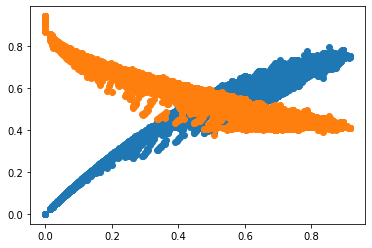

In [4]:
V_stack=np.array(V_stack, dtype=float)
I_stack=np.array(I_stack, dtype=float)
Temp=np.array(Temp, dtype=float)
Fan=np.array(Fan, dtype=float)
H_2=np.array(H_2, dtype=float)
P_stack=np.array(P_stack, dtype=float)

#Data normalization
V_stack=V_stack/10
I_stack=I_stack/10
Temp=Temp/50
Fan=Fan/100
H_2=H_2/1100
P_stack=P_stack/50

print(V_stack[0:10])

plt.scatter(I_stack, P_stack)
plt.scatter(I_stack, V_stack)


Total_size=  33856
Training_size=  27084
Testing_size=  6772


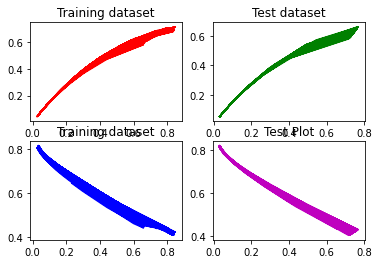

In [9]:
Total_size=len(V_stack)
Training_size= int(.8 * Total_size)
Testing_size= Total_size - Training_size

#training data
V_stack_train=V_stack[:Training_size]
I_stack_train=I_stack[:Training_size]
Temp_train=Temp[:Training_size]
Fan_train=Fan[:Training_size]
H_2_train=H_2[:Training_size]
P_stack_train=P_stack[:Training_size]

#testing data
V_stack_test=V_stack[Training_size:]
I_stack_test=I_stack[Training_size:]
Temp_test=Temp[Training_size:]
Fan_test=Fan[Training_size:]
H_2_test=H_2[Training_size:]
P_stack_test=P_stack[Training_size:]

print("Total_size= ", Total_size)
print("Training_size= ", Training_size)
print("Testing_size= ", Testing_size)
# print(len(V_stack_train))

# plt.scatter(I_stack_train, P_stack_train)
# plt.scatter(I_stack_train, V_stack_train)

# plt.scatter(I_stack_test, P_stack_test)
# plt.scatter(I_stack_test, V_stack_test)



fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(I_stack_train[:2000], P_stack_train[0:2000], 'r', label='Istack Vs Pstack') #row=0, col=0
ax[0, 0].title.set_text('Training dataset')
ax[1, 0].plot(I_stack_train[0:2000], V_stack_train[0:2000], 'b', label='Istack Vs Vstack') #row=1, col=0
ax[1, 0].title.set_text('Training dataset')
ax[0, 1].plot(I_stack_test[:1000], P_stack_test[0:1000], 'g', label='Istack Vs Pstack') #row=0, col=1
ax[0, 1].title.set_text('Test dataset')
ax[1, 1].plot(I_stack_test[0:1000], V_stack_test[0:1000], 'm', label='Istack Vs Vstack') #row=1, col=1
ax[1, 1].title.set_text('Test Plot')
plt.show()


# plt.plot(I_stack_train[:2000], P_stack_train[0:2000], 'r', label='Istack Vs Pstack')
# plt.title('Training dataset')
# plt.legend()
# plt.figure()
# plt.plot(I_stack_train[0:2000], V_stack_train[0:2000], 'b', label='Istack Vs Vstack')
# plt.title('Training dataset')
# plt.legend()
# plt.figure()


# plt.plot(I_stack_test[:1000], P_stack_test[0:1000], 'g', label='Istack Vs Pstack')
# plt.title('Test dataset')
# plt.legend()
# plt.figure()
# plt.plot(I_stack_test[0:1000], V_stack_test[0:1000], 'm', label='Istack Vs Vstack')
# plt.title('Test dataset')
# plt.legend()
# plt.figure()



# plt.show()




In [6]:
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > DESIRED_ACCURACY):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()

In [7]:
# !gdown "https://github.com/Mohamed-derbeli/Fuel-cell-system/blob/main/FC50_All_data00.csv"
# Get the current working directory
# directory_path = os.getcwd()
# print("Current working directory: ", directory_path)

#path= f"{getcwd()}/../tmp2/FC50_All_data00.xlsx"
# Get the current working directory
# directory_path = os.getcwd()
# print("Current working directory: ", directory_path)
# Change the current working directory
# os.chdir('/tmp')
# print("Current working directory: ", directory_path)
#read_data = open(directory_path) 
# pd.read_excel (path)

#  with open('./FC50_All_data00.csv','r') as csvfile:
# #   read_data =  pd.read_excel(exelfile)
#     read_data = csv.reader(csvfile, delimiter=',')
#     next(read_data)
#     print(read_data)
#     I=[]
#     for row in read_data:
#       I.append(row)
#     print(I)

# Load the xlsx file
#excel_data = pd.read_excel('./FC50_All_data00.xlsx')
# Read the values of the file in the dataframe
# data = pd.DataFrame(excel_data, columns=[])
# # Print the content
# print("The content of the file is:\n", data)

#Total_size= sum(len(a) for a in V_stack)# for n dimension
# V_stack=np.reshape(V_stack,[1,10])
x=[]
a=  [[0, 6, 12, 18, 24, 30, 36, 42, 48, 54],[0, 6, 12, 18, 24, 30, 36, 42, 48, 54],[0, 6, 12, 18, 24, 30, 36, 42, 48, 54]]
b =  [1, 7, 13, 19, 25, 31, 37, 43, 49, 55]
c =  [2, 8, 14, 20, 26, 32, 38, 44, 50, 56]
d =  [3, 9, 15, 21, 27, 33, 39, 45, 51, 57]
x.append(a)
x.append(b)
a=np.array(a)
b=np.array(b)
print(x)
print(a.shape)
print(b[5])

[[[0, 6, 12, 18, 24, 30, 36, 42, 48, 54], [0, 6, 12, 18, 24, 30, 36, 42, 48, 54], [0, 6, 12, 18, 24, 30, 36, 42, 48, 54]], [1, 7, 13, 19, 25, 31, 37, 43, 49, 55]]
(3, 10)
31
